<a href="https://colab.research.google.com/github/michael1017/CS551-WASM-On-Cloud/blob/master/Test/Scaling_Test_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Command to get the Repo


In [4]:
!git clone https://github.com/michael1017/CS551-WASM-On-Cloud.git


Cloning into 'CS551-WASM-On-Cloud'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 198 (delta 23), reused 85 (delta 15), pack-reused 105
Receiving objects: 100% (198/198), 65.13 MiB | 22.62 MiB/s, done.
Resolving deltas: 100% (24/24), done.


The command to set the DIR

In [15]:
!cd CS551-WASM-On-Cloud
!pwd
!ls -l


/content
total 8
drwxr-xr-x 7 root root 4096 Nov 29 20:07 CS551-WASM-On-Cloud
drwxr-xr-x 1 root root 4096 Nov 28 14:27 sample_data


The code for compilation and plotting

In [33]:
# Latency test
# Curl request (100) avg time
import random
import requests
import binascii
from time import perf_counter
import os
import threading


plot_points=[]
def convert_image_to_hex(file_name):
    hex_value = ""
    with open(file_name, 'rb') as f:
        content = f.read()
    hex_value = str(binascii.hexlify(content), encoding="utf-8")
    return hex_value

def post_request(url_link, image):
    response = None
    if is_gcp_test:
        data = {
            "img": image
        }
        headers = {
            "Content-Type": "application/json"
        }
        response = requests.post(url_link, headers=headers, json=data)
    else:
        response = requests.post(url_link, data=image)
    #print(response.text)

def scale_test(num_users, url_link):
    total_latency = 0
    image_hex = []
    for (dir_path, dir_names, file_names) in os.walk("Images"):
        for file_name in file_names:
            file_path = dir_path + "/" + file_name
            image_hex.append(convert_image_to_hex(file_path))

    threads = []

    start = perf_counter()
    for _ in range(num_users):
        image_object = random.choice(image_hex)
        thread = threading.Thread(post_request(url_link, image_object))
        thread.start()
        threads.append(thread)

    for thread in threads:
        thread.join()
    end = perf_counter()
    total_latency = end - start

    # DO NOT DELETE
    # query = f"curl -X POST {url_link} -d {image_object}"
    # os.system(query)
    # print(response.text)
    plot_points.append(total_latency)
    print(total_latency)
    return total_latency

def record_data(url_link):
    return [(num_users, scale_test(num_users, url_link)) for num_users in [1, 10, 20, 30, 40, 50, 100]]


is_gcp_test = False
if __name__ == "__main__":
    # AWS PYTHON
    # url_link = "https://xb28uuj612.execute-api.us-east-2.amazonaws.com/default/aws_lambda_classify_pytorch_wasm"

    # AWS WASM
    url_link = "https://51wrp9c8ya.execute-api.us-east-1.amazonaws.com/default/classify"

    # AZURE MOBILENET
    #url_link = "https://classifytf2.azurewebsites.net/api/classify"

    # GCP
    #url_link = "https://us-central1-curious-context-406603.cloudfunctions.net/function-1"
    #is_gcp_test = True

    print(url_link)
    print(record_data(url_link))
    num_users=['1', '10', '20', '30', '40', '50', '100']
    fig = plt.figure(figsize = (10, 5))
    plt.bar(num_users,plot_points)
    plt.ylabel("Latency")
    plt.xlabel("No Of Users")
    plt.show()


https://51wrp9c8ya.execute-api.us-east-1.amazonaws.com/default/classify
5.709229559999585
48.34619503900012
84.97793823099983
156.39040657500027
204.76726698200036


KeyboardInterrupt: ignored

In [35]:
!git pull
!git push

remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 9), reused 13 (delta 8), pack-reused 0
Unpacking objects: 100% (14/14), 2.34 KiB | 478.00 KiB/s, done.
From https://github.com/michael1017/CS551-WASM-On-Cloud
   dbec61b..0599c84  master     -> origin/master
Updating dbec61b..0599c84
Fast-forward
 Test/test_avg_latency.py | 30 ++++++++++++++++++++++++++----
 Test/test_scale.py       | 30 +++++++++++++++++++++++++++---
 tf/aws/hello.py          | 13 ++++++++++---
 tf/azure/function_app.py | 18 +++++++++++-------
 tf/gcp/main.py           | 21 ++++++++++++---------
 5 files changed, 86 insertions(+), 26 deletions(-)
fatal: could not read Username for 'https://github.com': No such device or address


The Matplotlib code just for plotting

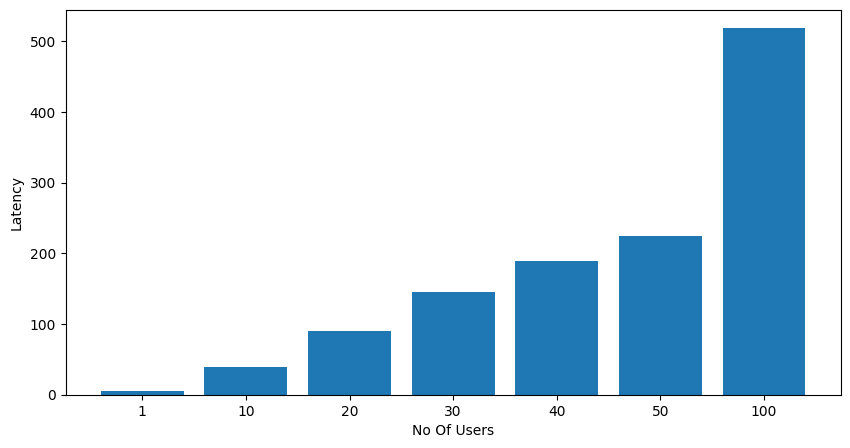

In [32]:
data_points = [4.685355999972671, 39.741022041998804, 90.59681029198691, 144.84225174994208, 189.51015508291312, 224.6391749579925, 518.6442481250269]
num_users=['1', '10', '20', '30', '40', '50', '100']
fig = plt.figure(figsize = (10, 5))
plt.bar(num_users,data_points)
plt.ylabel("Latency")
plt.xlabel("No Of Users")
plt.show()
